In [1]:
import numpy as np # linear algebra
import pandas as pd 
import numpy as np # linear algebra
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm

In [2]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

<AxesSubplot:>

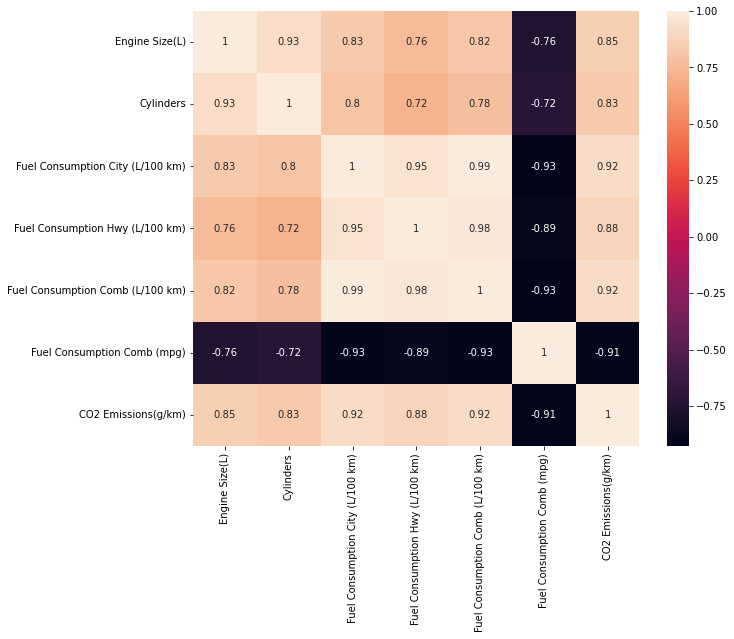

In [4]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

In [5]:
Ft = pd.get_dummies(df['Fuel Type'],drop_first=True,prefix='Fuel')
df = df.drop(['Fuel Type'],axis=1)
df = pd.concat([df,Ft],axis=1)
Tr = pd.get_dummies(df['Transmission'],drop_first=True)
df = df.drop(['Transmission'],axis=1)
df = pd.concat([df,Tr],axis=1)


In [6]:
X = df.drop(['CO2 Emissions(g/km)','Fuel Consumption Comb (mpg)'],axis=1)
y = df['CO2 Emissions(g/km)']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)

In [8]:
cat_cols = ['Make','Model','Vehicle Class']
target_enc = ce.CatBoostEncoder(cols = cat_cols)
target_enc.fit(x_train[cat_cols],y_train)

CatBoostEncoder(cols=['Make', 'Model', 'Vehicle Class'])

In [9]:
train_enc = target_enc.transform(x_train[cat_cols])
test_enc = target_enc.transform(x_test[cat_cols])

x_train = x_train.drop(['Make','Model','Vehicle Class'],axis=1)
x_test = x_test.drop(['Make','Model','Vehicle Class'],axis=1)
x_train = pd.concat([x_train,train_enc],axis=1)
x_test = pd.concat([x_test,test_enc],axis=1)

In [10]:
x_train.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel_E,Fuel_N,Fuel_X,Fuel_Z,A4,...,AV10,AV6,AV7,AV8,M5,M6,M7,Make,Model,Vehicle Class
6022,3.3,6,11.6,8.5,10.2,0,0,1,0,0,...,0,0,0,0,0,0,0,215.976786,251.237541,263.584824
4553,6.2,8,17.1,12.0,14.8,0,0,0,1,0,...,0,0,0,0,0,1,0,264.109334,334.447508,248.168964
4071,2.0,4,10.4,8.0,9.3,0,0,0,1,0,...,0,0,0,0,0,0,0,280.461209,251.237541,248.168964
5239,3.5,6,11.2,8.4,9.9,0,0,1,0,0,...,0,0,1,0,0,0,0,240.934216,237.079180,238.227719
1844,3.5,6,11.9,8.2,10.2,0,0,0,1,0,...,0,0,0,0,0,0,0,280.461209,238.309385,222.304381


# SVM

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # For Mx=0 and Dx=1
from sklearn.svm import SVC
model = make_pipeline(StandardScaler(), SVC(C = 1000000, random_state = 0)) # create SVM classifier
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy (train): ', model.score(x_train, y_train))
print('Accuracy (test) : ', model.score(x_test, y_test))

Accuracy (train):  0.9471830985915493
Accuracy (test) :  0.33983211481180614


In [32]:
model2 = make_pipeline(StandardScaler(), SVC(C = 10, random_state = 0)) # create SVM classifier
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print('Accuracy (train): ', model2.score(x_train, y_train))
print('Accuracy (test) : ', model2.score(x_test, y_test))

Accuracy (train):  0.31581798483206935
Accuracy (test) :  0.1421608448415922


In [33]:
model4 = make_pipeline(StandardScaler(), SVC(C = 1000000, kernel = 'rbf', random_state = 0)) # create SVM classifier
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
print('Accuracy (train): ', model4.score(x_train, y_train))
print('Accuracy (test) : ', model4.score(x_test, y_test))
y_pred

Accuracy (train):  0.9471830985915493
Accuracy (test) :  0.33983211481180614


array([222, 214, 128, ..., 211, 299, 325], dtype=int64)

In [24]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
gs = GridSearchCV(svm.SVC(), param_grid)
k = gs.fit(x_train, y_train)
print("accuracy  =", k.best_score_)
print("С =", k.best_params_['C'], "gamma =", k.best_params_['gamma'], "kernel =", k.best_params_['kernel'])

C:\Users\ellun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


accuracy  = 0.22671705336809794
С = 1000 gamma = 0.1 kernel = rbf


In [28]:
model =svm.SVC(kernel=k.best_params_['kernel'], C=k.best_params_['C'], gamma=k.best_params_['gamma'])
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(accuracy_score(pred, y_test))

0.25995125913891143


In [30]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

          96       1.00      1.00      1.00         2
         102       0.00      0.00      0.00         1
         103       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         0
         105       0.14      1.00      0.25         1
         106       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         2
         109       0.00      0.00      0.00         2
         110       1.00      0.50      0.67         4
         111       0.00      0.00      0.00         0
         113       0.00      0.00      0.00         2
         114       0.67      1.00      0.80         4
         115       0.00      0.00      0.00         1
         118       0.00      0.00      0.00         1
         120       1.00      0.33      0.50         3
         121       0.50      0.50      0.50         2
         122       0.00      0.00      0.00         1
         124       0.50    

C:\Users\ellun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellun\anaconda3\lib\site-packages\sklearn\metrics\_cla

# KNN

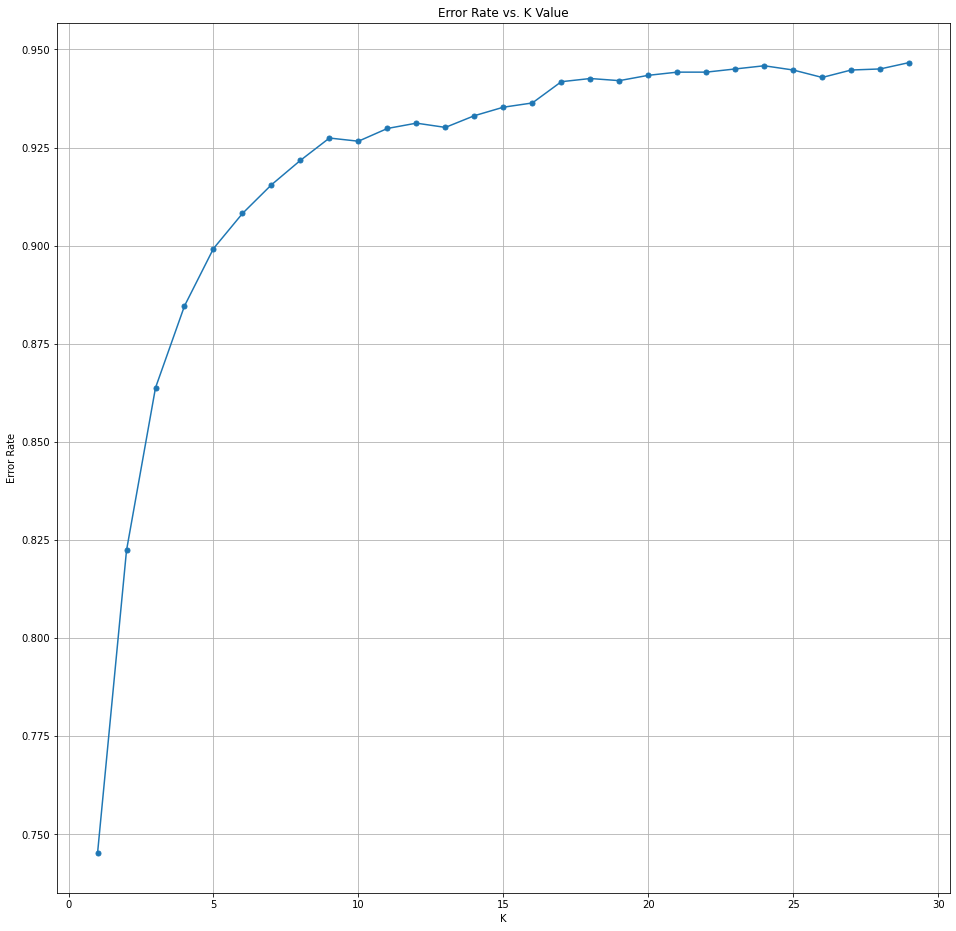

In [15]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

    
plt.figure(figsize=(16, 16))
plt.plot(range(1, 30), error_rate, marker='.', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

# Decision Tree

In [16]:
dt = DecisionTreeClassifier(max_depth=20)
dt.fit(x_train, y_train.ravel())
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

print('accuracy(train): ', round(accuracy_score(y_train, y_train_pred)*100, 4))

accuracy(train):  93.8516


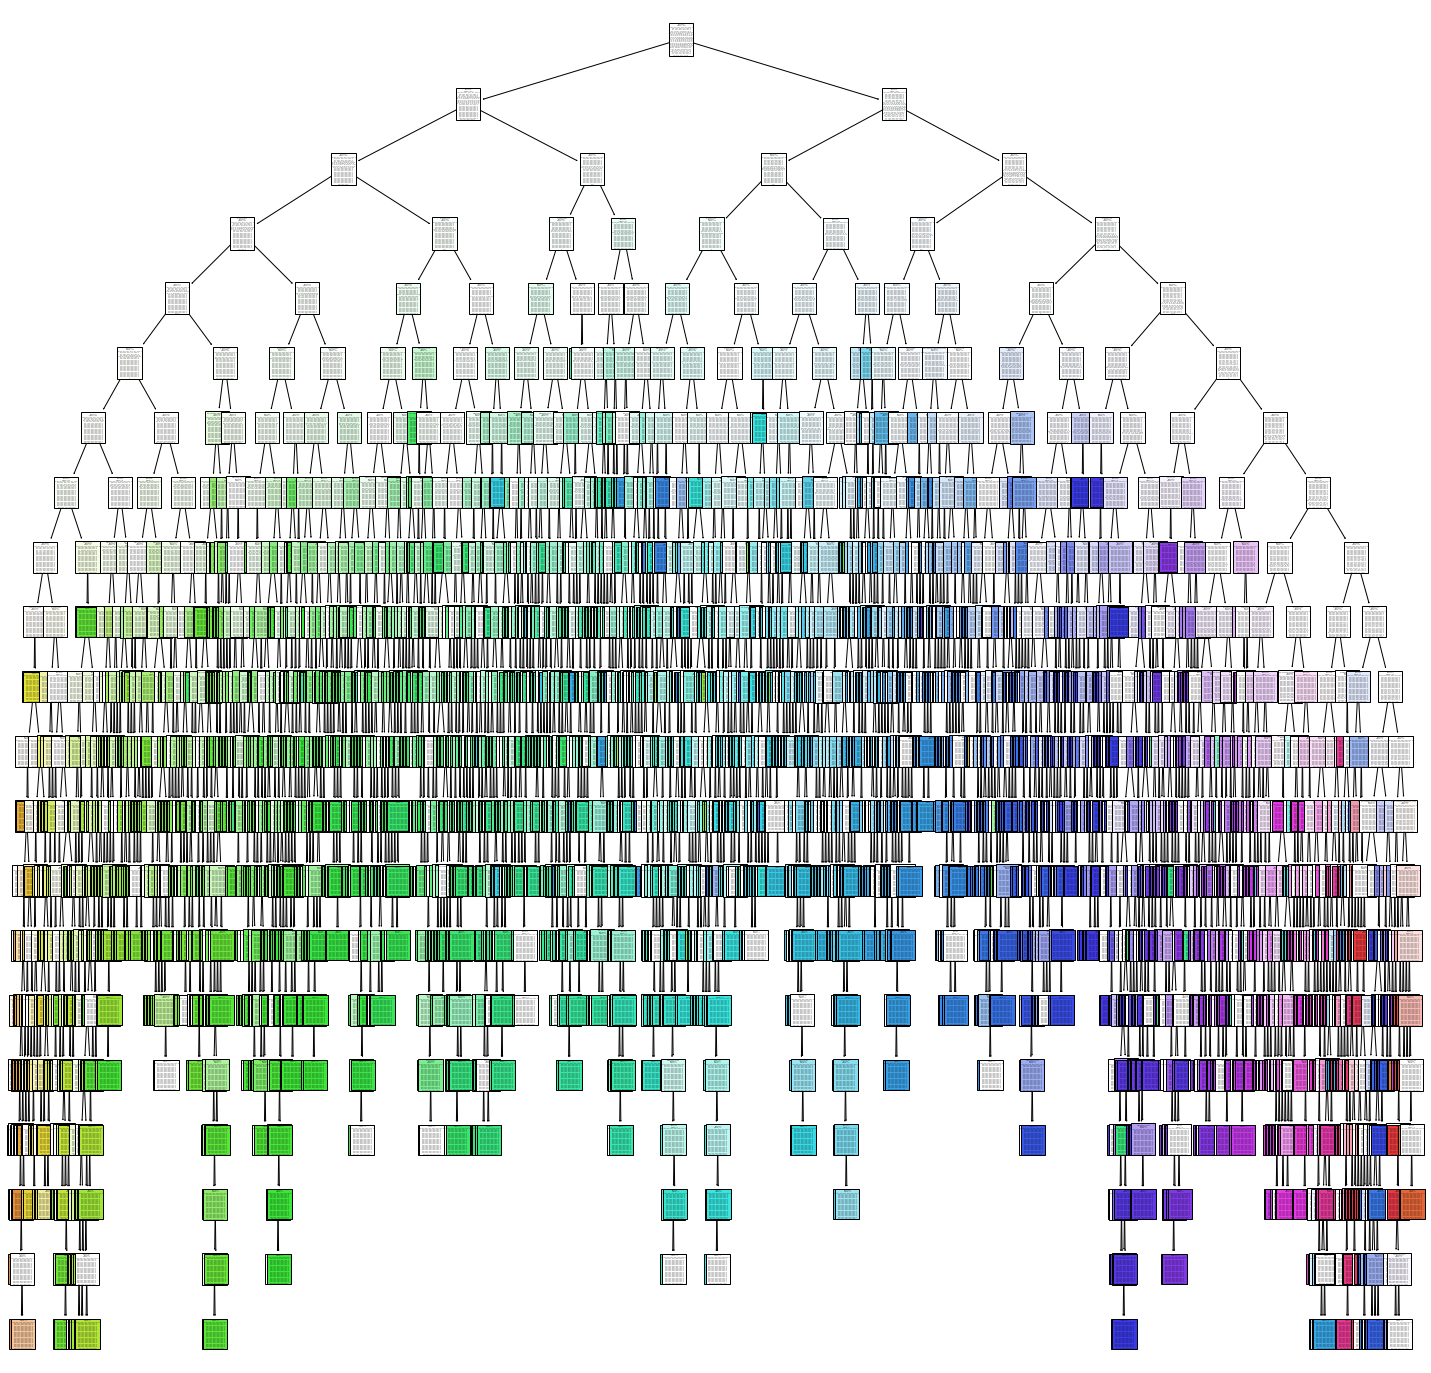

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 25))
plot_tree(dt, filled=True, feature_names=df.columns)
plt.show()

# Random Forest

In [25]:
random_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'gini')
random_classifier.fit(x_train, y_train)

y_pred = random_classifier.predict(x_test)
print('Accuracy (train): ', random_classifier.score(x_train, y_train))

Accuracy (train):  0.9344528710725893


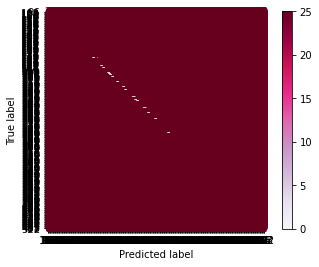

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_classifier, x_test, y_test, cmap = plt.cm.PuRd)

# AdaBoost

In [18]:
from sklearn.ensemble import AdaBoostClassifier

grid_params = {'learning_rate':np.arange(0.2,1,0.2),'n_estimators': np.arange(50,200,50)}
gs = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5)), grid_params, verbose = 5, n_jobs = -1, cv = 5)
k = gs.fit(x_train,y_train)
print("accuracy =",k.best_score_)
print("learning_rate =",k.best_params_['learning_rate'], "n_estimators =", k.best_params_['n_estimators'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\ellun\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


accuracy = 0.3513042234617204
learning_rate = 0.2 n_estimators = 150


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
model = k.best_estimator_
#model = AdaBoostClassifier(learning_rate = k.best_params_['learning_rate'], n_estimators = k.best_params_['n_estimators'])
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(metrics.accuracy_score(pred,y_test))

0.33170863796371514


In [20]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test,pred ))

              precision    recall  f1-score   support

          96       1.00      1.00      1.00         2
         102       0.00      0.00      0.00         1
         103       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         0
         105       0.25      1.00      0.40         1
         106       0.00      0.00      0.00         1
         108       0.00      0.00      0.00         2
         109       0.00      0.00      0.00         2
         110       1.00      0.50      0.67         4
         113       1.00      0.50      0.67         2
         114       0.40      1.00      0.57         4
         115       0.00      0.00      0.00         1
         118       0.00      0.00      0.00         1
         120       1.00      1.00      1.00         3
         121       0.67      1.00      0.80         2
         122       0.00      0.00      0.00         1
         124       0.50      1.00      0.67         1
         126       0.00    

C:\Users\ellun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ellun\anaconda3\lib\site-packages\sklearn\metrics\_cla